In [1]:
import yfinance as yf
# BTC-USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "^NSEBANK" #"BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-07,15589.500000,15592.799805,15349.200195,15367.599609,15367.420898,33200
2014-07-08,15437.400391,15437.400391,14889.349609,14997.500000,14997.326172,26400
2014-07-09,15008.250000,15093.450195,14827.099609,14931.099609,14930.925781,30700
2014-07-10,14940.000000,15371.049805,14621.950195,14821.700195,14821.528320,48100
2014-07-11,14796.900391,14918.849609,14406.650391,14447.200195,14447.032227,33000


In [4]:
bit_coin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03
mean,30243.221733,30455.130198,29988.227401,30225.055132,30224.792259,1.132712e+06
std,9465.810892,9504.985916,9421.954128,9467.180222,9467.210593,3.898431e+07
min,13844.450195,13844.450195,13519.900391,13555.700195,13555.542969,0.000000e+00
25%,22715.787598,22857.875488,22510.375000,22691.874512,22691.610840,0.000000e+00
50%,28629.825195,28937.649414,28225.950195,28656.824219,28656.490234,0.000000e+00
75%,37410.986328,37820.850586,37217.398438,37538.074219,37537.636719,1.883500e+05
max,53357.699219,53357.699219,52815.898438,53103.699219,53103.699219,1.798102e+09


In [5]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2014-07-07 to 2024-07-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2180 non-null   float64
 1   High       2180 non-null   float64
 2   Low        2180 non-null   float64
 3   Close      2180 non-null   float64
 4   Adj Close  2180 non-null   float64
 5   Volume     2180 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.2 KB


In [6]:
bit_coin_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
Closing_price = bit_coin_data[['Close']]
Closing_price

,Close
Date,
2014-07-07,15367.599609
2014-07-08,14997.500000
2014-07-09,14931.099609
2014-07-10,14821.700195
2014-07-11,14447.200195
...,...
2024-07-01,52574.750000
2024-07-02,52168.101562
2024-07-03,53089.250000


Text(0.5, 1.0, 'Close price of Bit Coin')

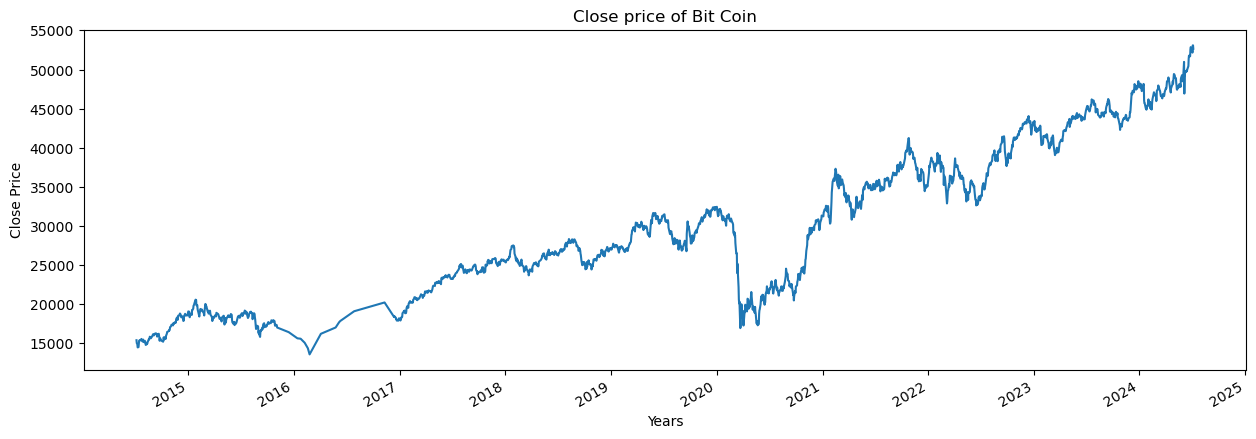

In [8]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [18]:
# 1,2,3,4,5,6,7,8,9,10

# MA 5 days for each value(CP) = null, null, null, null, 3, 4, 5...


In [19]:
# (2+3+4+5+6)//5

In [9]:
for i in range(2014,2024):
    print(list(Closing_price.index.year).count(i))

116
196
25
246
245
241
249
247
247
245


In [11]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_15332\686540890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


Date
2014-07-07   NaN
2014-07-08   NaN
2014-07-09   NaN
2014-07-10   NaN
2014-07-11   NaN
Name: MA_for_365_days, dtype: float64

In [12]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2017-02-06             NaN
2017-02-07             NaN
2017-02-08             NaN
2017-02-09             NaN
2017-02-10    17734.821575
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

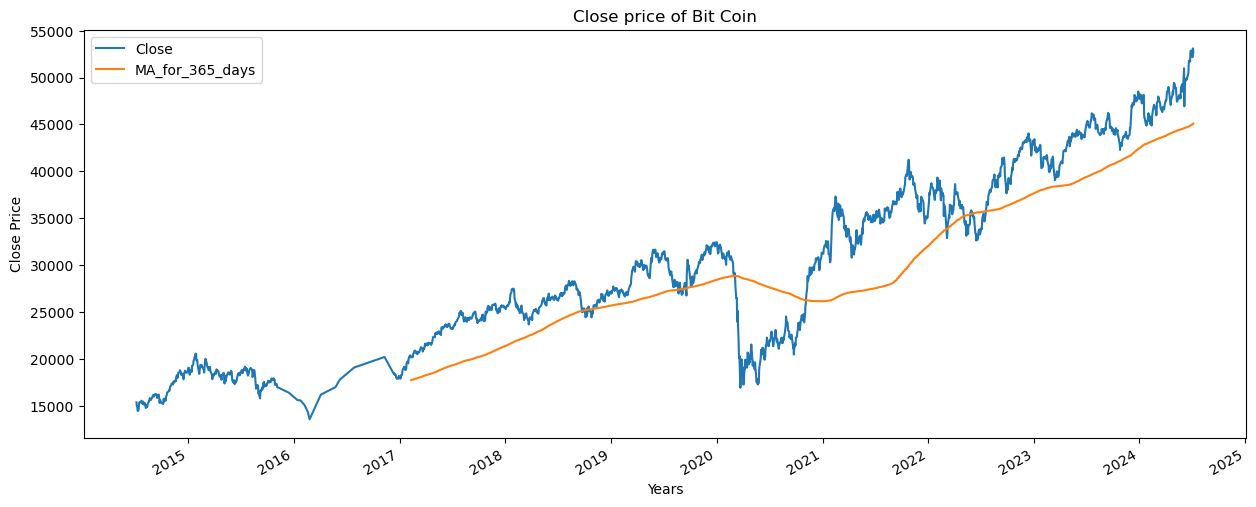

In [13]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

C:\Users\hp\AppData\Local\Temp\ipykernel_15332\1013624105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

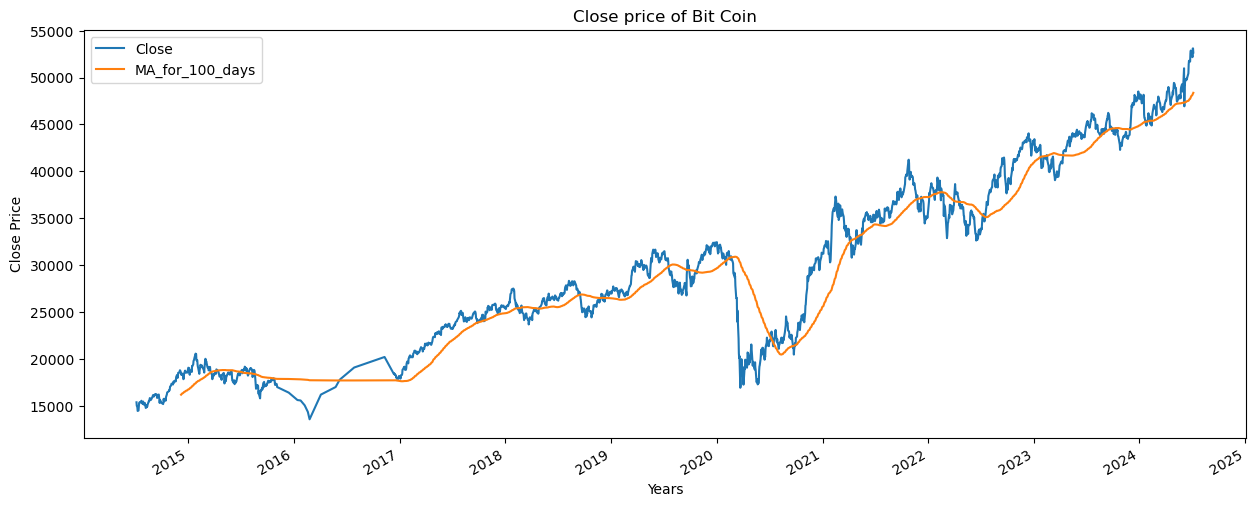

In [15]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [25]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day future days close price using our model

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[0.0458152 ],
       [0.03645696],
       [0.03477798],
       ...,
       [0.99963464],
       [1.        ],
       [0.98878963]])

In [17]:
scaled_data.shape

(2180, 1)

In [21]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [22]:
x_data[0], y_data[0]

(array([[0.0458152 ],
        [0.03645696],
        [0.03477798],
        [0.03201173],
        [0.02254223],
        [0.02361813],
        [0.0337868 ],
        [0.04323228],
        [0.04332329],
        [0.04636516],
        [0.04627921],
        [0.04732602],
        [0.04822747],
        [0.05003159],
        [0.0446685 ],
        [0.04188455],
        [0.04795945],
        [0.04328663],
        [0.03975169],
        [0.04264816],
        [0.04393521],
        [0.03673891],
        [0.03618766],
        [0.03059699],
        [0.0326464 ],
        [0.03795388],
        [0.03426723],
        [0.03878705],
        [0.04763957],
        [0.04978634],
        [0.04870031],
        [0.05326439],
        [0.05723299],
        [0.05343633],
        [0.05230099],
        [0.05466649],
        [0.05524174],
        [0.06212956],
        [0.06510695],
        [0.06458733],
        [0.06265423],
        [0.0613634 ],
        [0.06703247],
        [0.06576944],
        [0.06564301],
        [0

In [23]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]


In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1872, 100, 1)
(1872, 1)
(208, 100, 1)
(208, 1)


In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
model.fit(x_train, y_train, batch_size =50, epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 0.0313
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 7.6700e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 5.8286e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 5.0495e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - loss: 5.5890e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - loss: 5.9067e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 5.3613e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss: 5.1797e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - loss: 4.8712e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - loss: 5.6916e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - loss: 5.0056e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - loss: 4.1139e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - loss: 3.8967e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss

In [59]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


array([[0.7787613 ],
       [0.77228844],
       [0.78189814],
       [0.7793529 ],
       [0.7725688 ],
       [0.76739454],
       [0.7816309 ],
       [0.7817729 ],
       [0.78055674],
       [0.7775014 ],
       [0.79201806],
       [0.7961812 ],
       [0.807398  ],
       [0.8030653 ],
       [0.8163953 ],
       [0.81570655],
       [0.82313436],
       [0.8141917 ],
       [0.7998947 ],
       [0.78181404],
       [0.7860659 ],
       [0.78848326],
       [0.7830726 ],
       [0.78321826],
       [0.7744471 ],
       [0.7848119 ],
       [0.7762264 ],
       [0.765788  ],
       [0.77567667],
       [0.77694744],
       [0.76272005],
       [0.7803526 ],
       [0.7800193 ],
       [0.7826785 ],
       [0.7731666 ],
       [0.77409935],
       [0.7791018 ],
       [0.76249313],
       [0.7630359 ],
       [0.7616175 ],
       [0.7449334 ],
       [0.7396302 ],
       [0.7242039 ],
       [0.742046  ],
       [0.7444455 ],
       [0.7380864 ],
       [0.7354952 ],
       [0.745

In [60]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[51284.797],
       [51231.582],
       [51310.586],
       [51289.66 ],
       [51233.887],
       [51191.344],
       [51308.387],
       [51309.555],
       [51299.555],
       [51274.438],
       [51393.79 ],
       [51428.01 ],
       [51520.234],
       [51484.61 ],
       [51594.2  ],
       [51588.54 ],
       [51649.605],
       [51576.086],
       [51458.543],
       [51309.895],
       [51344.85 ],
       [51364.727],
       [51320.242],
       [51321.438],
       [51249.33 ],
       [51334.54 ],
       [51263.957],
       [51178.137],
       [51259.434],
       [51269.883],
       [51152.914],
       [51297.88 ],
       [51295.137],
       [51317.   ],
       [51238.8  ],
       [51246.47 ],
       [51287.594],
       [51151.047],
       [51155.51 ],
       [51143.848],
       [51006.684],
       [50963.082],
       [50836.254],
       [50982.945],
       [51002.67 ],
       [50950.39 ],
       [50929.09 ],
       [51009.11 ],
       [51060.477],
       [51121.062],


In [61]:
inv_y_test = scaler.inverse_transform(y_test)

In [62]:
inv_predictions[:5], inv_y_test[:5]

(array([[51284.797],
        [51231.582],
        [51310.586],
        [51289.66 ],
        [51233.887]], dtype=float32),
 array([[51259.28851196],
        [51314.003771  ],
        [51314.12882703],
        [51259.52806733],
        [51208.91773169]]))

In [63]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2023-08-25,51259.288512,51284.796875
2023-08-28,51314.003771,51231.582031
2023-08-29,51314.128827,51310.585938
2023-08-30,51259.528067,51289.660156
2023-08-31,51208.917732,51233.886719


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

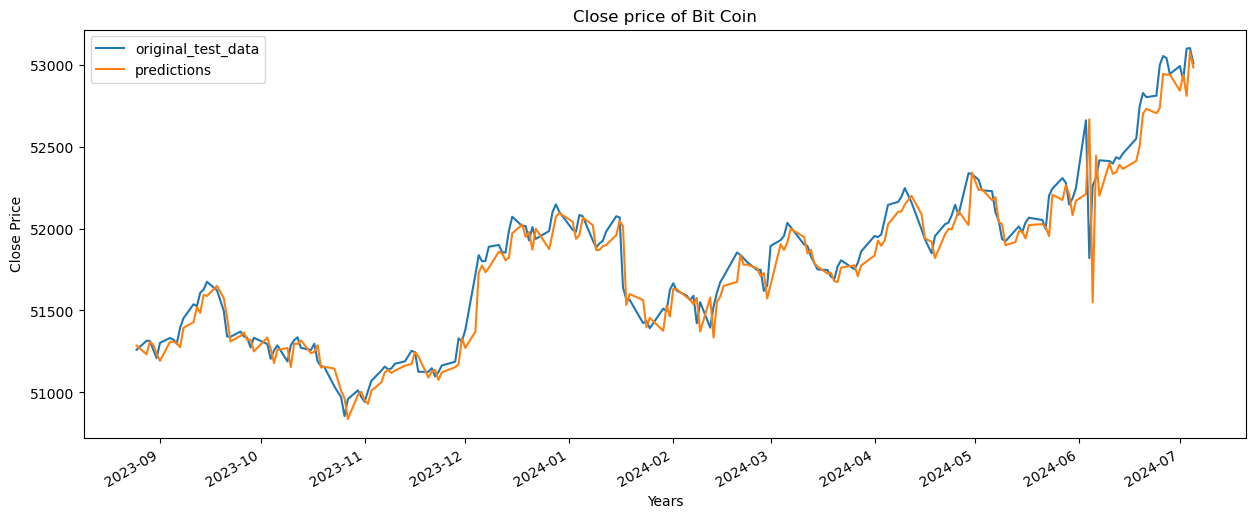

In [64]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [65]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

,Close
Date,
2024-07-01,52574.750000
2024-07-02,52168.101562
2024-07-03,53089.250000
2024-07-04,53103.699219
2024-07-05,52660.351562


In [66]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.0983465 ],
        [0.11387895],
        [0.01578189],
        [0.09150464],
        [0.        ],
        [0.07543055],
        [0.12480169],
        [0.16258064],
        [0.18276602],
        [0.26904615],
        [0.25998448],
        [0.24783353],
        [0.23469098],
        [0.20607681],
        [0.20748176],
        [0.13147298],
        [0.1506606 ],
        [0.29248474],
        [0.31306543],
        [0.32825721],
        [0.37501277],
        [0.35924941],
        [0.29746599],
        [0.29193739],
        [0.25531396],
        [0.23203929],
        [0.20821774],
        [0.20600364],
        [0.18275984],
        [0.17377088],
        [0.21926164],
        [0.2410159 ],
        [0.20895941],
        [0.23155276],
        [0.27274408],
        [0.32792272],
        [0.32393306],
        [0.33351784],
        [0.38661685],
        [0.43919274],
        [0.44997532],
        [0.46808059],
        [0.49922483],
        [0.4478895 ],
        [0.35164117],
        [0

In [67]:
last_100.shape

(1, 100, 1)

In [68]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.9268209]], dtype=float32)

In [69]:
scaler.inverse_transform(day101)

array([[52502.062]], dtype=float32)

In [70]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days

In [71]:

# def predict_future(no_of_days, prev_100):
    
#     future_predictions = []
#     for i in range(no_of_days):
#         next_day = model.predict(prev_100).tolist()
#         prev_100[0].append(next_day[0])
#         prev_100 = [prev_100[0][1:]]
        
#         future_predictions.append(scaler.inverse_transform(next_day))
        
#     return future_predictions



def predict_future(no_of_days, prev_100):
    future_predictions = []
    for i in range(no_of_days):
        # Predict the next day
        next_day = model.predict(prev_100).tolist()
        
        # Convert prev_100 to a list, append the next_day prediction, and update prev_100
        prev_100_list = prev_100.tolist()
        prev_100_list[0].append(next_day[0])
        prev_100 = np.array([prev_100_list[0][1:]])
        
        # Inverse transform the prediction and add to future_predictions
        future_predictions.append(scaler.inverse_transform(next_day))
        
    return future_predictions


In [72]:
# no_of_days = 10
# # last_100 = last_100.tolist()
# future_results = predict_future(no_of_days, last_100)
# print(future_results)

last_100 = np.array(last_100)
no_of_days = 10
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[array([[52502.06075223]]), array([[52463.88347393]]), array([[52424.74033357]]), array([[52382.03952779]]), array([[52340.22715829]]), array([[52300.00789765]]), array([[52261.09556451]]), array([[52223.29659443]]), array([[52186.61392765]]), array([[52151.15488215]])]


Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

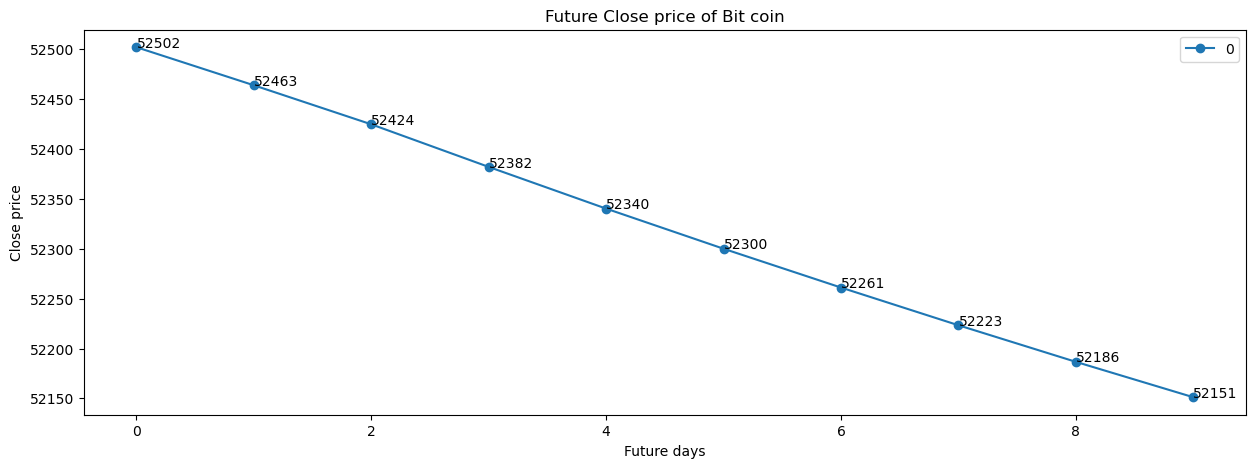

In [73]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")

In [74]:
model.save("Latest_bit_coin_model2.keras")